# Exploratory Analysis of House Prices Data
Data can be found in the Kaggle House Prices competition <a href ="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">here</a>.

The following EDA resources may be useful:

 * https://www.kaggle.com/truocpham/house-prices-exploratory-data-analysis
 * https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf
 * https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
 * https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
 * https://www.kaggle.com/tags/eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [21]:
DATA_PATH = "..\\data\\"
csv_files = np.sort(glob.glob(DATA_PATH+"*"))

sample_submission = pd.read_csv(csv_files[1])
test_df = pd.read_csv(csv_files[2])
train_df = pd.read_csv(csv_files[3])

Get data types.

In [24]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Look for missing values. Plot them and list them if any are found.

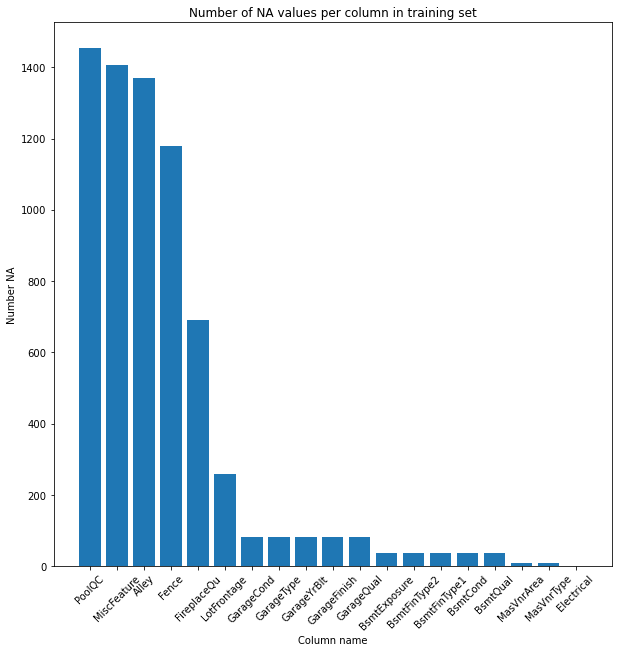

Columns with missing values:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [22]:
num_na = train_df.isna().sum(axis=0)
has_missing = num_na.sort_values(ascending=False)
has_missing = has_missing[has_missing > 0]

plt.figure(figsize=(10,10))
plt.bar(list(range(len(has_missing))),has_missing.values)
plt.xlabel("Column name")
plt.ylabel("Number NA")
plt.title("Number of NA values per column in training set")
plt.xticks(list(range(len(has_missing))), has_missing.index, rotation=45)
plt.show()

print("Columns with missing values:")
has_missing

In [23]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
